# Wordclouds

In [1]:
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
#loading data
cosine = pd.read_csv("df_cosine_complete.csv", index_col=[0])
jaccard = pd.read_csv("df_jaccard_complete.csv", index_col=[0] )
correlation = pd.read_csv("df_correlation_complete.csv",  index_col=[0])
test_info = pd.read_csv("word_test_df.csv", index_col=[0])

In [3]:
#highest similarities
print(cosine.sort_values("similarity", ascending=False)["similarity"].head(10).to_latex(),
      jaccard.sort_values("similarity", ascending=False)["similarity"].head(10).to_latex(),
      correlation.sort_values("similarity", ascending=False)["similarity"].head(10).to_latex())

#lowest similairties
print(cosine.sort_values("similarity", ascending=True)["similarity"].head(10).to_latex(),
      jaccard.sort_values("similarity", ascending=True).head(10).to_latex(),
      correlation.sort_values("similarity", ascending=True).head(10).to_latex())

\begin{tabular}{lr}
\toprule
{} &  similarity \\
\midrule
('bieber', 'belieb')    &    0.505412 \\
('iphon', 'appl')       &    0.478500 \\
('food', 'eat')         &    0.459141 \\
('goooood', 'goood')    &    0.437495 \\
('eat', 'chicken')      &    0.430283 \\
('comput', 'technolog') &    0.410024 \\
('iphon', 'android')    &    0.397792 \\
('husband', 'wife')     &    0.388493 \\
('bieber', 'selena')    &    0.378475 \\
('pizza', 'chicken')    &    0.376108 \\
\bottomrule
\end{tabular}
 \begin{tabular}{lr}
\toprule
{} &  similarity \\
\midrule
('iphon', 'appl')       &    0.276902 \\
('comput', 'technolog') &    0.254017 \\
('food', 'eat')         &    0.251473 \\
('bieber', 'belieb')    &    0.233134 \\
('iphon', 'android')    &    0.224593 \\
('husband', 'wife')     &    0.223449 \\
('cat', 'dog')          &    0.217506 \\
('revolut', 'egypt')    &    0.210979 \\
('pizza', 'chicken')    &    0.203109 \\
('belieb', 'selena')    &    0.198679 \\
\bottomrule
\end{tabular}
 \begin{tab

In [ ]:
# convert the dataframes into dictionaries to get the co-occurencing words as keys
dict_cosine = cosine.T.to_dict()
dict_jaccard = jaccard.T.to_dict()
dict_correlation = correlation.T.to_dict()

In [4]:
# function to get the all the words that occur with a target word in a dictionary
def get_word_cloud(dic, word):
    '''The function takes a pairs similarity dictionary and a target word
    and returns a dictionary containing only the words that co-occur with the target as keys and their similarity as values'''
    sim_word = dict()
    for pairs in dic.keys():
        lst = re.sub('[^A-Za-z]', ' ', pairs).strip().split()
        if word in lst:  
            if word == lst[0]:
                try:
                    W = test_info.loc[test_info["stem"] == lst[1]].index[0]
                except IndexError:
                    W = lst[1]
                sim_word[W] = dic[pairs]["similarity"]
            if word == lst[1]:
                try:
                    W = test_info.loc[test_info["stem"] == lst[0]].index[0]
                except IndexError:
                    W = lst[0]
                sim_word[W] = dic[pairs]["similarity"]
            sim_word[word] = 1
            
    return sim_word

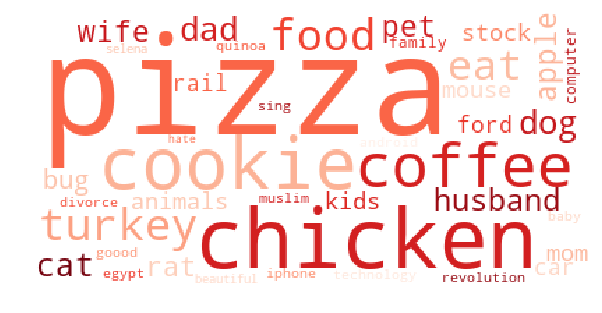

In [5]:
igure(figsize=(10,10))
cloud_Jaccard = WordCloud(background_color="white", max_words=40,relative_scaling=0.5,normalize_plurals=False, colormap="Reds").generate_from_frequencies(get_word_cloud(dict_jaccard, "pizza"))
plt.imshow(cloud_Jaccard)
plt.axis('off')
#plt.show()
plt.savefig('jaccardWC.png', bbox_inches='tight')

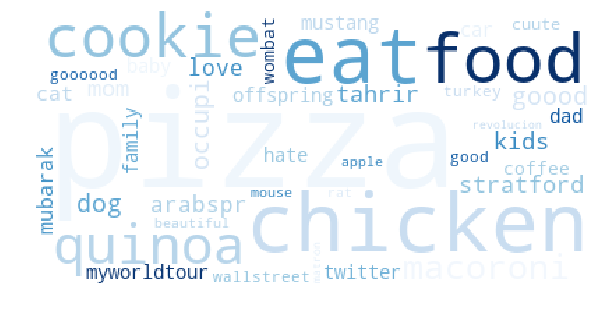

In [6]:
figure(figsize=(10,10))
cloud_correlation = WordCloud(background_color="white", max_words=40,relative_scaling=0.5,normalize_plurals=False, colormap="Blues").generate_from_frequencies(get_word_cloud(dict_correlation, "pizza"))
plt.imshow(cloud_correlation)
plt.axis('off')
#plt.show()
plt.savefig('correlationWC.png', bbox_inches='tight')

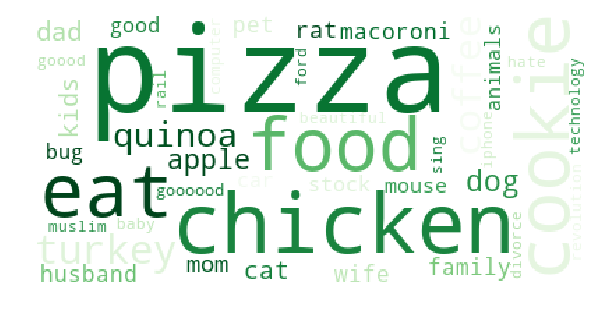

In [7]:
figure(figsize=(10,10))
cloud_cosine = WordCloud(background_color="white", max_words=40,relative_scaling=0.5,normalize_plurals=False, colormap="Greens").generate_from_frequencies(get_word_cloud(dict_cosine, "pizza"))
plt.imshow(cloud_cosine)
plt.axis('off')
#plt.show()
plt.savefig('cosineWC.png', bbox_inches='tight')